In [2]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd    
# Importing the dataset  
dataset = pd.read_csv('playdata.csv')  
x = dataset.iloc[:, [2, 3]].values  
y = dataset.iloc[:, 4].values
print(x)
print(y)
  
# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)  
  
# Feature Scaling  
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test) 
print(x_train)
print(x_test)

[[1 False]
 [1 True]
 [1 False]
 [1 False]
 [0 False]
 [0 True]
 [0 True]
 [1 False]
 [0 False]
 [0 True]
 [0 True]
 [0 False]
 [1 True]]
[0 0 1 1 1 1 1 0 1 1 1 1 0]
[[ 0.70710678 -0.89442719]
 [-1.41421356 -0.89442719]
 [ 0.70710678  1.11803399]
 [ 0.70710678 -0.89442719]
 [-1.41421356  1.11803399]
 [ 0.70710678 -0.89442719]
 [ 0.70710678 -0.89442719]
 [-1.41421356  1.11803399]
 [ 0.70710678  1.11803399]]
[[-1.41421356  1.11803399]
 [-1.41421356 -0.89442719]
 [-1.41421356 -0.89442719]
 [-1.41421356  1.11803399]]


In [3]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [4]:
# Predicting the Test set results  
y_pred = classifier.predict(x_test)  
print(y_pred)

[1 1 1 1]


In [5]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


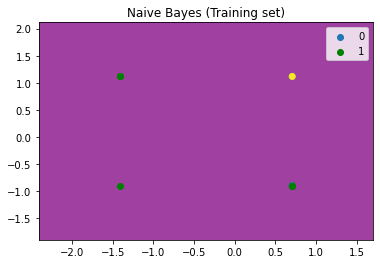

In [6]:
# Visualising the Training set results  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
X1, X2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(nm.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('purple', 'green')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Naive Bayes (Training set)')  
mtp.xlabel('')  
mtp.ylabel('')  
mtp.legend()  
mtp.show()  

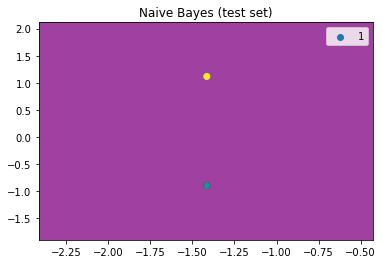

In [7]:
# Visualising the Test set results  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
X1, X2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(nm.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('purple', 'green')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Naive Bayes (test set)')  
mtp.xlabel('')  
mtp.ylabel('')  
mtp.legend()  
mtp.show()  

In [8]:
# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 95.0
